Q1: Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [17]:
toyota = pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/assignments/ToyotaCorolla.csv',encoding='latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


EDA

In [18]:
print(toyota.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [19]:
toyota = toyota.rename({'Quarterly_Tax':'QT','Age_08_04':'AGE','Price':'PRICE','cc':'CC','Doors':'DOORS','Gears':'GEARS','Weight':'WEIGHT'},axis = 1)
toyota[["PRICE","AGE","KM","HP","CC","DOORS","GEARS","QT","WEIGHT"]]

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [20]:
toyota[toyota.duplicated()]

,Id,Model,PRICE,AGE,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


In [ ]:
toyota=toyota.drop_duplicates().reset_index(drop=true)
toyota[["PRICE","AGE","KM","HP","CC","DOORS","GEARS","QT","WEIGHT"]]

In [23]:
toyota[["PRICE","AGE","KM","HP","CC","DOORS","GEARS","QT","WEIGHT"]].describe

<bound method NDFrame.describe of       PRICE  AGE     KM   HP    CC  DOORS  GEARS   QT  WEIGHT
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500   69  20544   86  1300      3      5   69    1025
1432  10845   72  19000   86  1300      3      5   69    1015
1433   8500   71  17016   86  1300      3      5   69    1015
1434   7250   70  16916   86  1300      3      5   69    1015
1435   6950   76      1  110  1600      5      5   19    1114

[1436 rows x 9 columns]>

CORRELATION ANALYSIS

In [22]:
toyota[["PRICE","AGE","KM","HP","CC","DOORS","GEARS","QT","WEIGHT"]].corr()

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
PRICE,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
AGE,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
DOORS,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
GEARS,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WEIGHT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


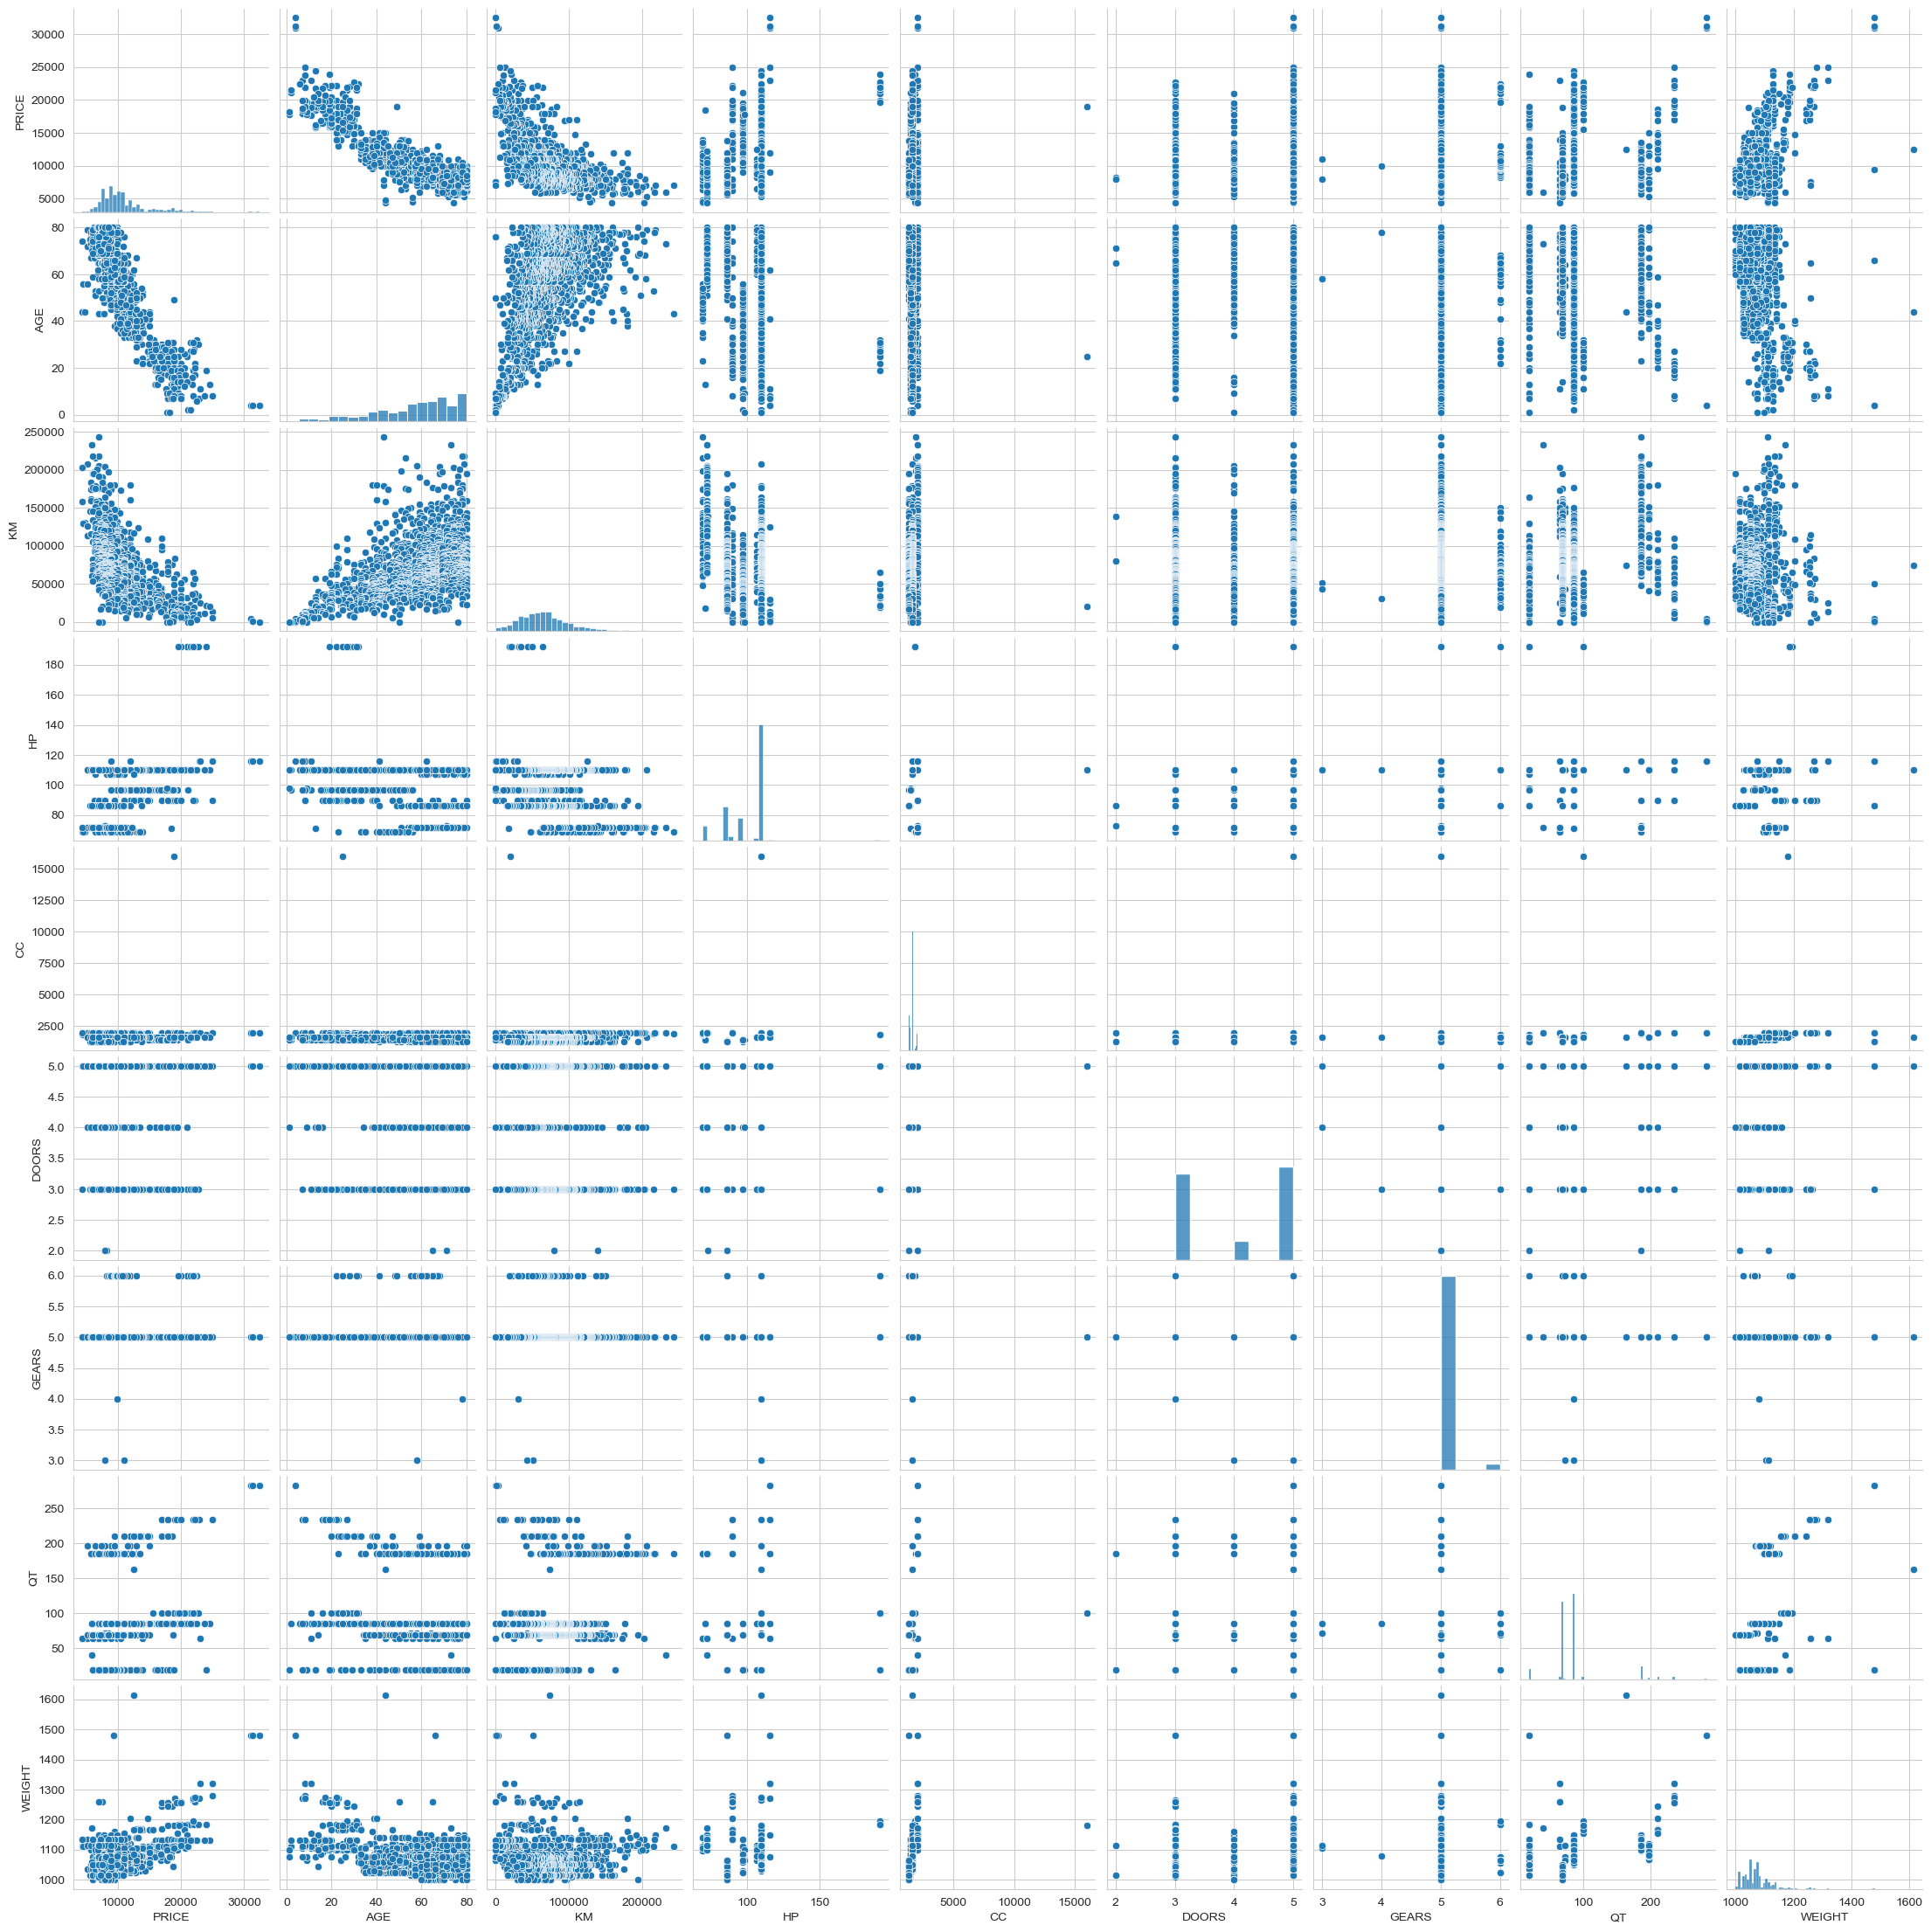

In [26]:
sns.set_style(style = 'whitegrid')
sns.pairplot(toyota[["PRICE","AGE","KM","HP","CC","DOORS","GEARS","QT","WEIGHT"]])

MODEL BUILDING

In [28]:
model =smf.ols("PRICE ~ AGE+KM+HP+CC+DOORS+GEARS+QT+WEIGHT",data = toyota).fit()

MODEL TESTING

In [29]:
model.params

Intercept   -5573.106358
AGE          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
DOORS          -1.616641
GEARS         594.319936
QT              3.949081
WEIGHT         16.958632
dtype: float64

In [30]:
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.948666
 AGE         -46.511852
 KM          -16.621622
 HP           11.241018
 CC           -1.344222
 DOORS        -0.040410
 GEARS         3.016007
 QT            3.014535
 WEIGHT       15.879803
 dtype: float64,
 Intercept    0.00008
 AGE          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.17909
 DOORS        0.96777
 GEARS        0.00261
 QT           0.00262
 WEIGHT       0.00000
 dtype: float64)

In [31]:
model.rsquared , model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

In [32]:
#BUILDING SLR AND MLR MODEL FOR DOOR AND CC
slr_cc = smf.ols(formula = 'PRICE ~ CC',data=toyota).fit()
print('P VALUE OF CC: \n',slr_cc.pvalues,'\n\nT VALUE OF CC: \n',slr_cc.tvalues)

P VALUE OF CC: 
 Intercept    1.766912e-112
CC            1.550808e-06
dtype: float64 

T VALUE OF CC: 
 Intercept    24.694090
CC            4.824822
dtype: float64


In [33]:
slr_d = smf.ols(formula = 'PRICE ~ DOORS',data = toyota).fit()
print('P VALUE OF DOORS: \n',slr_d.pvalues,'\n\nT VALUE OF DOORS: \n',slr_d.tvalues)

P VALUE OF DOORS: 
 Intercept    1.094732e-73
DOORS        1.461237e-12
dtype: float64 

T VALUE OF DOORS: 
 Intercept    19.258097
DOORS         7.141657
dtype: float64


In [34]:
mlr_cc_d = smf.ols(formula = 'PRICE ~ CC+DOORS',data = toyota).fit()
print('P VALUE OF CC AND DOORS: \n',mlr_cc_d.pvalues,'\n\nT VALUE OF CC AND DOORS: \n',mlr_cc_d.tvalues)

P VALUE OF CC AND DOORS: 
 Intercept    1.056885e-34
CC           1.521992e-05
DOORS        1.373469e-11
dtype: float64 

T VALUE OF CC AND DOORS: 
 Intercept    12.620704
CC            4.340400
DOORS         6.816153
dtype: float64


AS WE CAN SEE,

HERE THE CC AND DOORS HAVE A SIGNIFICANT P VALUE IN CASE OF SLR AND MLR.

MODEL VALIDATION TECHNIQUES

THERE ARE TWO TECHINQUES:

• COLINEARITY CHECK

• RESIDUAL ANALYSIS

In [35]:
# COLINEARITY CHECKING
# VIF = 1/(1 - RSQUARE) OF EACH INDEPENDENT VARIABLES

rsq_age = smf.ols('AGE ~ KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data = toyota).fit().rsquared
vif_age = 1 / (1 - rsq_age)

rsq_km = smf.ols('KM ~ AGE+HP+CC+DOORS+GEARS+QT+WEIGHT ',data = toyota).fit().rsquared
vif_km = 1 / (1 - rsq_km)

rsq_hp = smf.ols('HP ~ AGE+KM+CC+DOORS+GEARS+QT+WEIGHT ',data = toyota).fit().rsquared
vif_hp = 1 / (1 - rsq_hp)

rsq_cc = smf.ols('CC ~ AGE+KM+HP+DOORS+GEARS+QT+WEIGHT ',data = toyota).fit().rsquared
vif_cc = 1 / (1 - rsq_cc)

rsq_doors = smf.ols('DOORS ~ AGE+KM+HP+CC+GEARS+QT+WEIGHT ',data = toyota).fit().rsquared
vif_doors = 1 / (1 - rsq_doors)

rsq_gears = smf.ols('GEARS ~ AGE+KM+HP+CC+DOORS+QT+WEIGHT ',data = toyota).fit().rsquared
vif_gears = 1 / (1 - rsq_gears)

rsq_qt = smf.ols('QT ~ AGE+KM+HP+CC+DOORS+GEARS+WEIGHT ',data = toyota).fit().rsquared
vif_qt = 1 / (1 - rsq_qt)

rsq_weight = smf.ols('WEIGHT ~ AGE+KM+HP+CC+DOORS+GEARS+QT ',data = toyota).fit().rsquared
vif_weight = 1 / (1 - rsq_weight)

df = {'VARIABLES':["AGE","KM","HP","CC","DOORS","GEARS","QT","WEIGHT"],'VIF' : [vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_weight]}
VIF_DF = pd.DataFrame(df)
VIF_DF

,VARIABLES,VIF
0,AGE,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,DOORS,1.156575
5,GEARS,1.098723
6,QT,2.311431
7,WEIGHT,2.516420


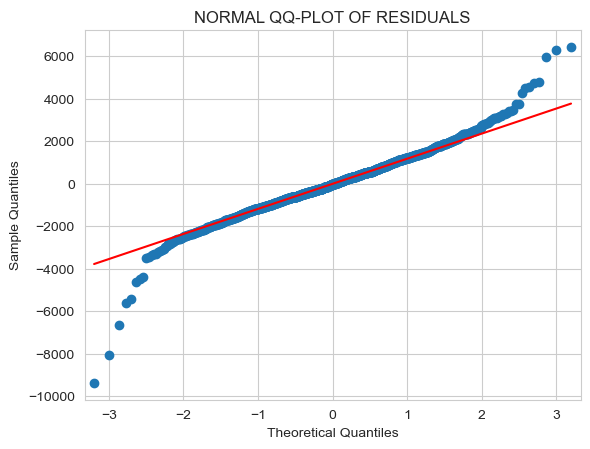

In [36]:
# so we can consider all the variables in the regression equation since there is no vif>20
# 2. RESIDUAL ANALYSIS

import statsmodels.api as sm
sm.qqplot(model.resid,line = 'q') 
# 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title('NORMAL QQ-PLOT OF RESIDUALS')
plt.show()

In [37]:
# To detect the residuals in qq-plot
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [38]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [40]:
#TEST FOR HOMOSCEDASTICITY OR HETEROSCEDASTICITY
def standard_values(vals) : 
    return (vals - vals.mean())/vals.std() # z = (x - µ) / sigma

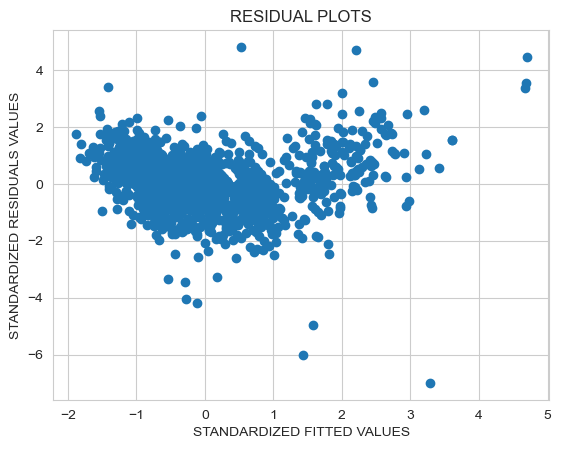

In [41]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('RESIDUAL PLOTS')
plt.xlabel('STANDARDIZED FITTED VALUES')
plt.ylabel('STANDARDIZED RESIDUALS VALUES')
plt.show()

eval_env: 1


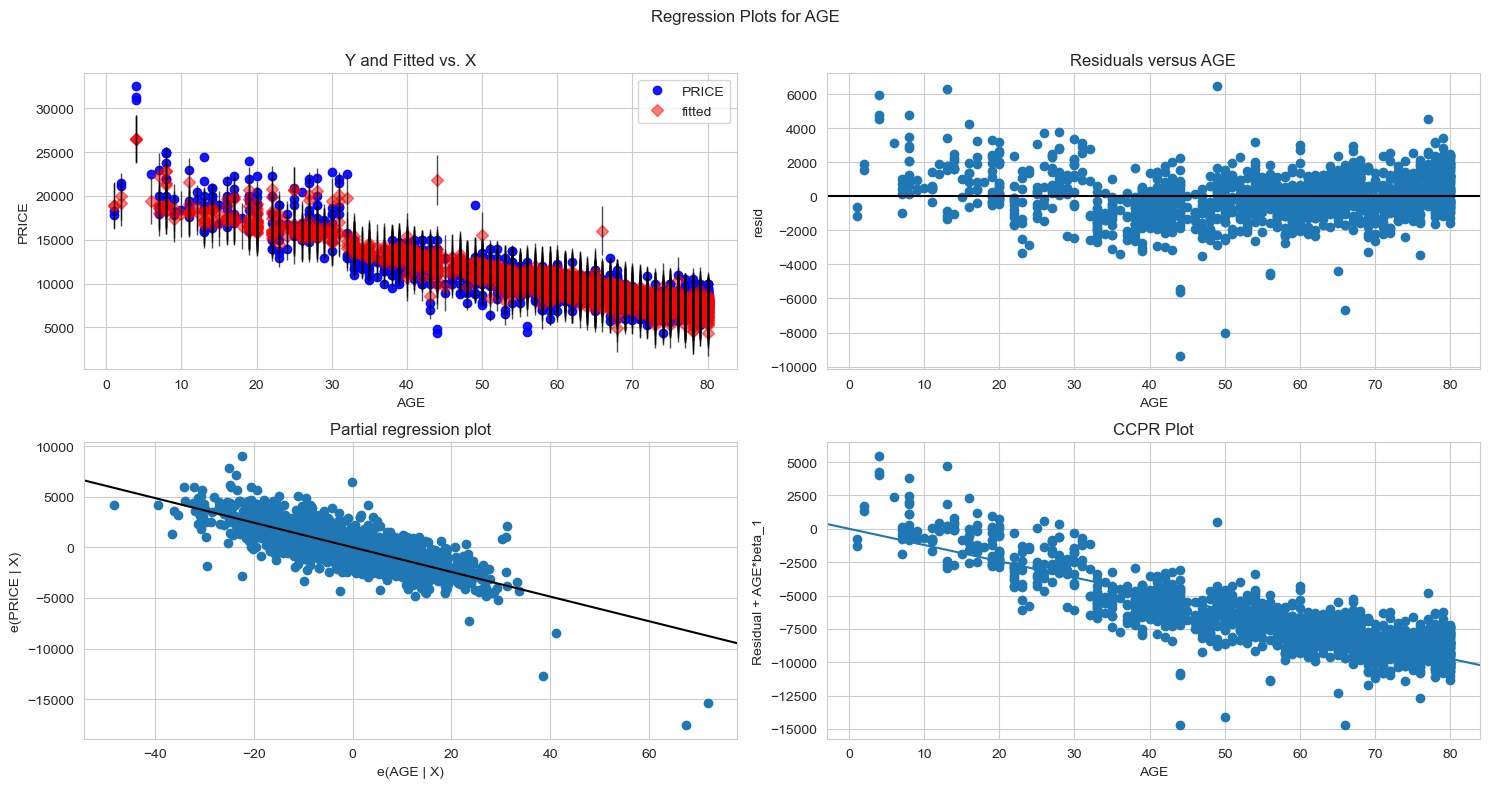

In [42]:
# TEST FOR ERROR OR RESIDUAL VS REGRESSORS
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AGE',fig=fig)
plt.show()

eval_env: 1


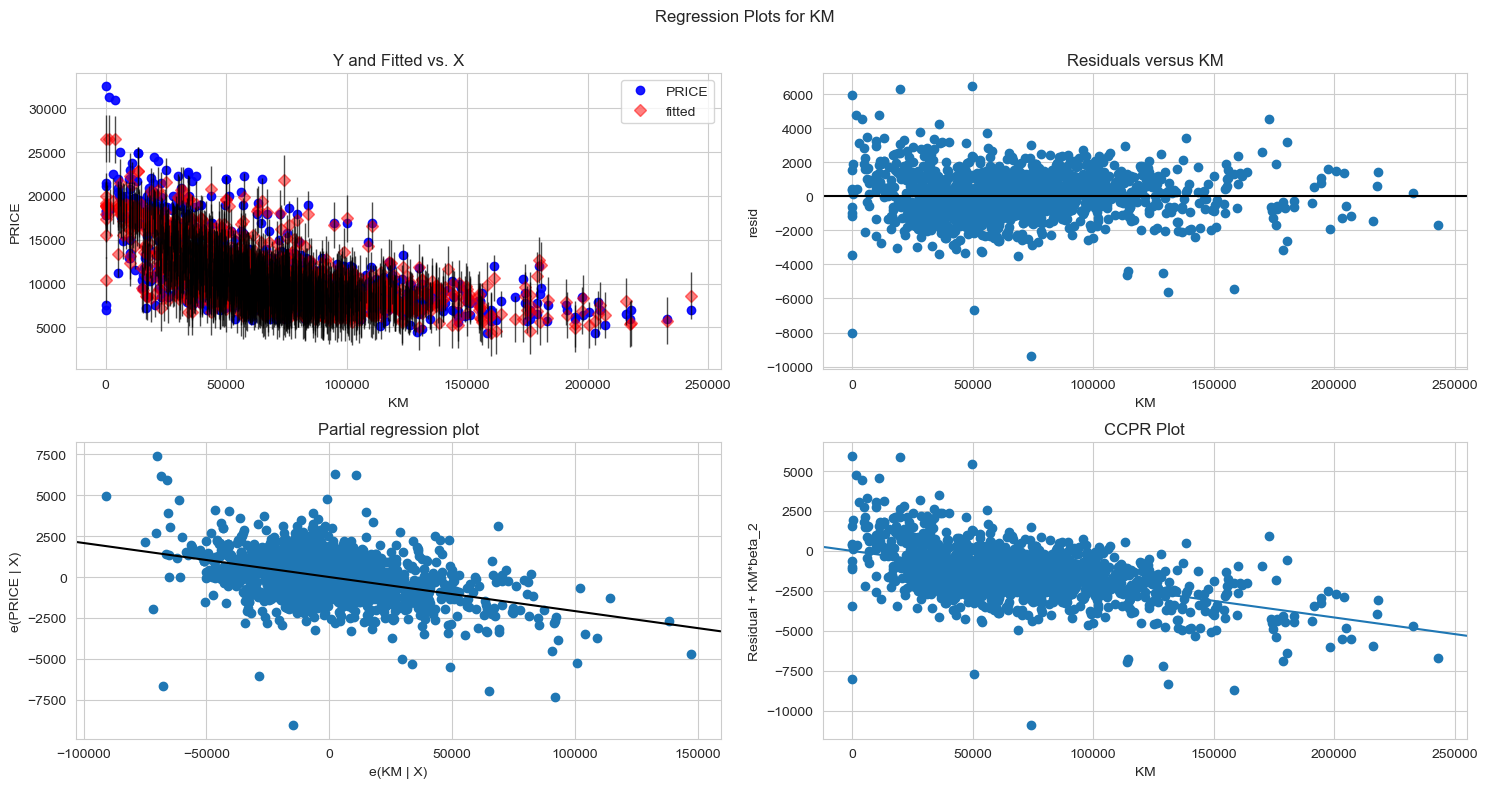

In [43]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


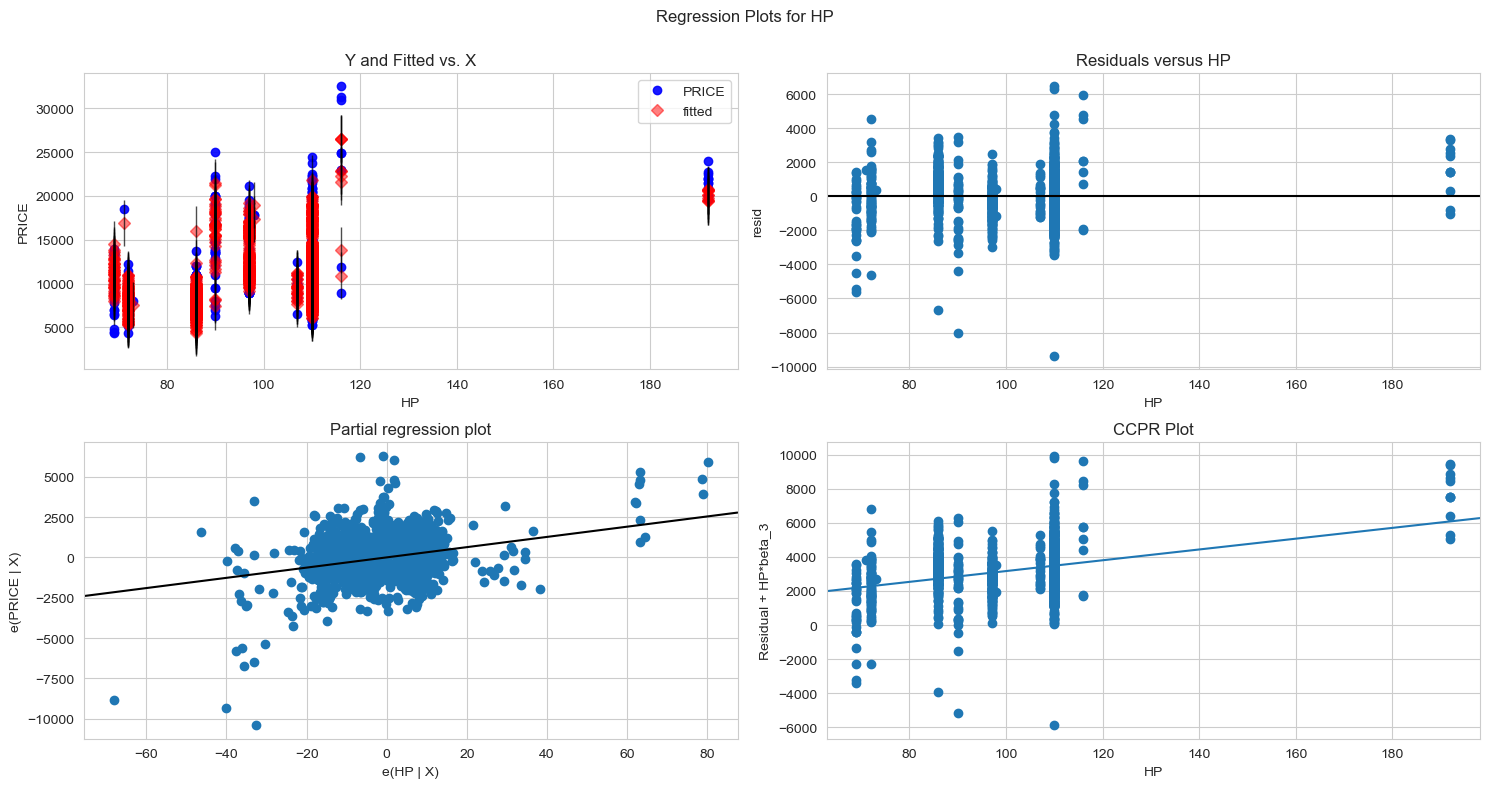

In [44]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


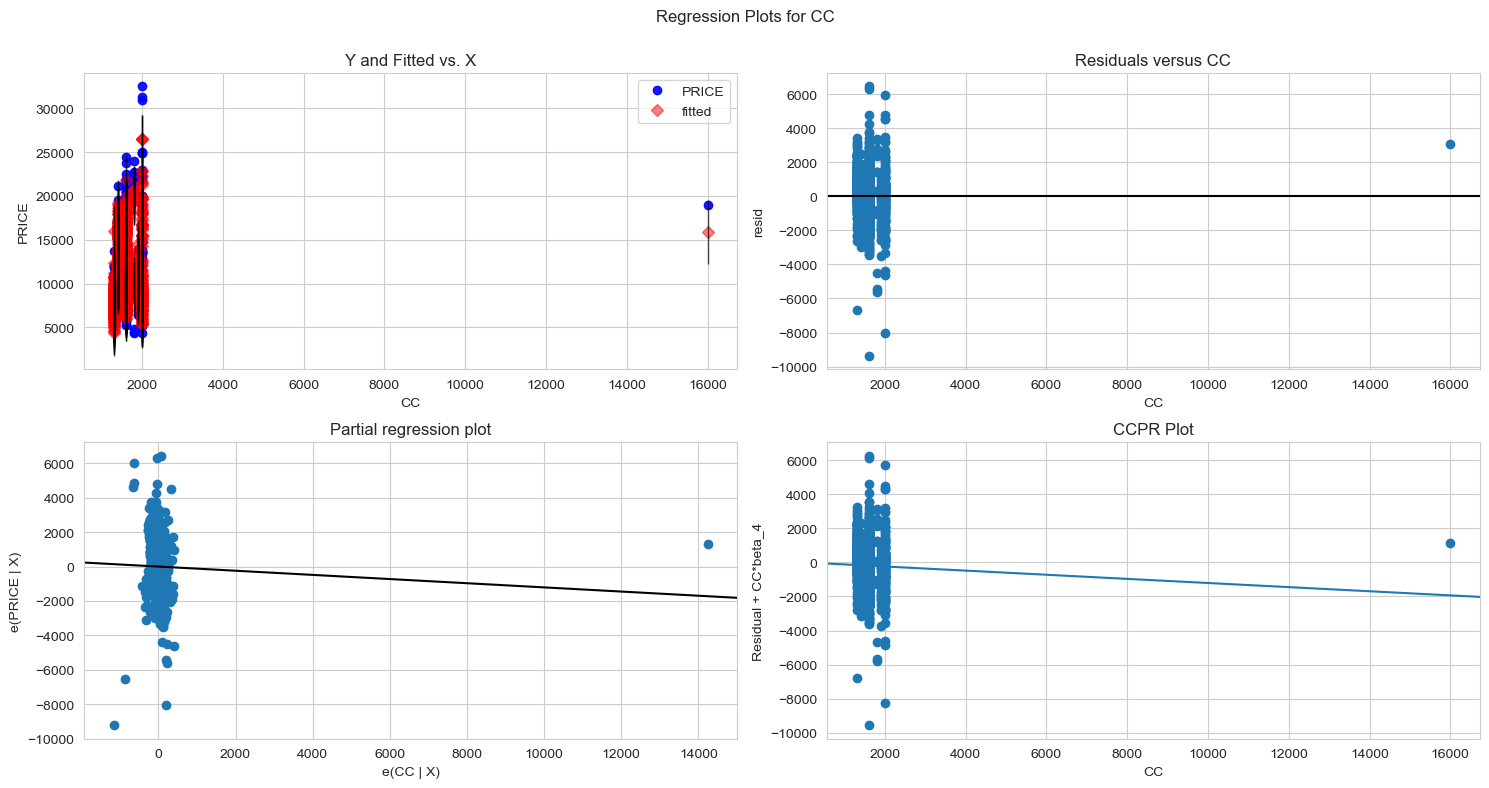

In [45]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


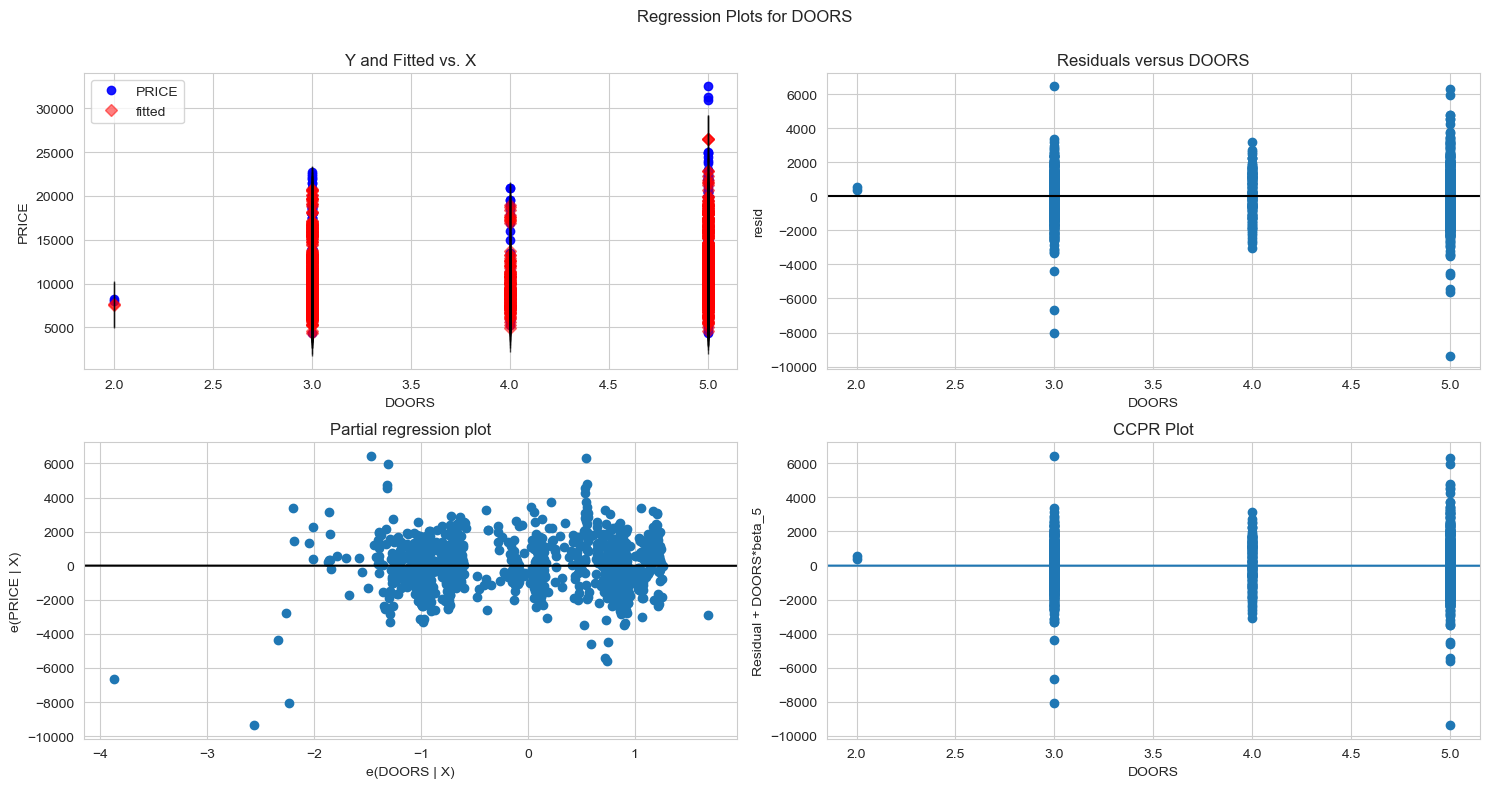

In [46]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'DOORS',fig=fig)
plt.show()

eval_env: 1


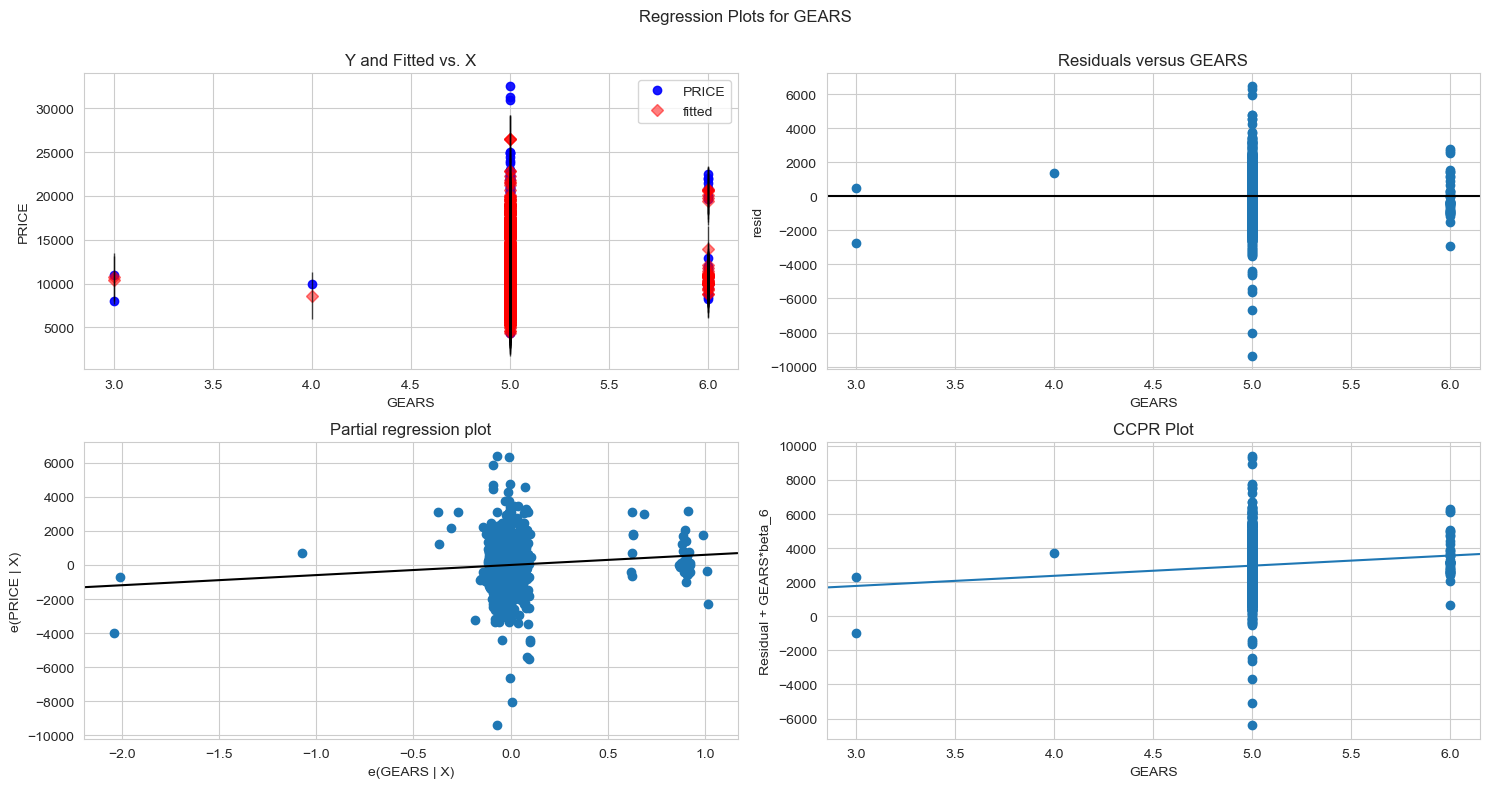

In [47]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'GEARS',fig=fig)
plt.show()

eval_env: 1


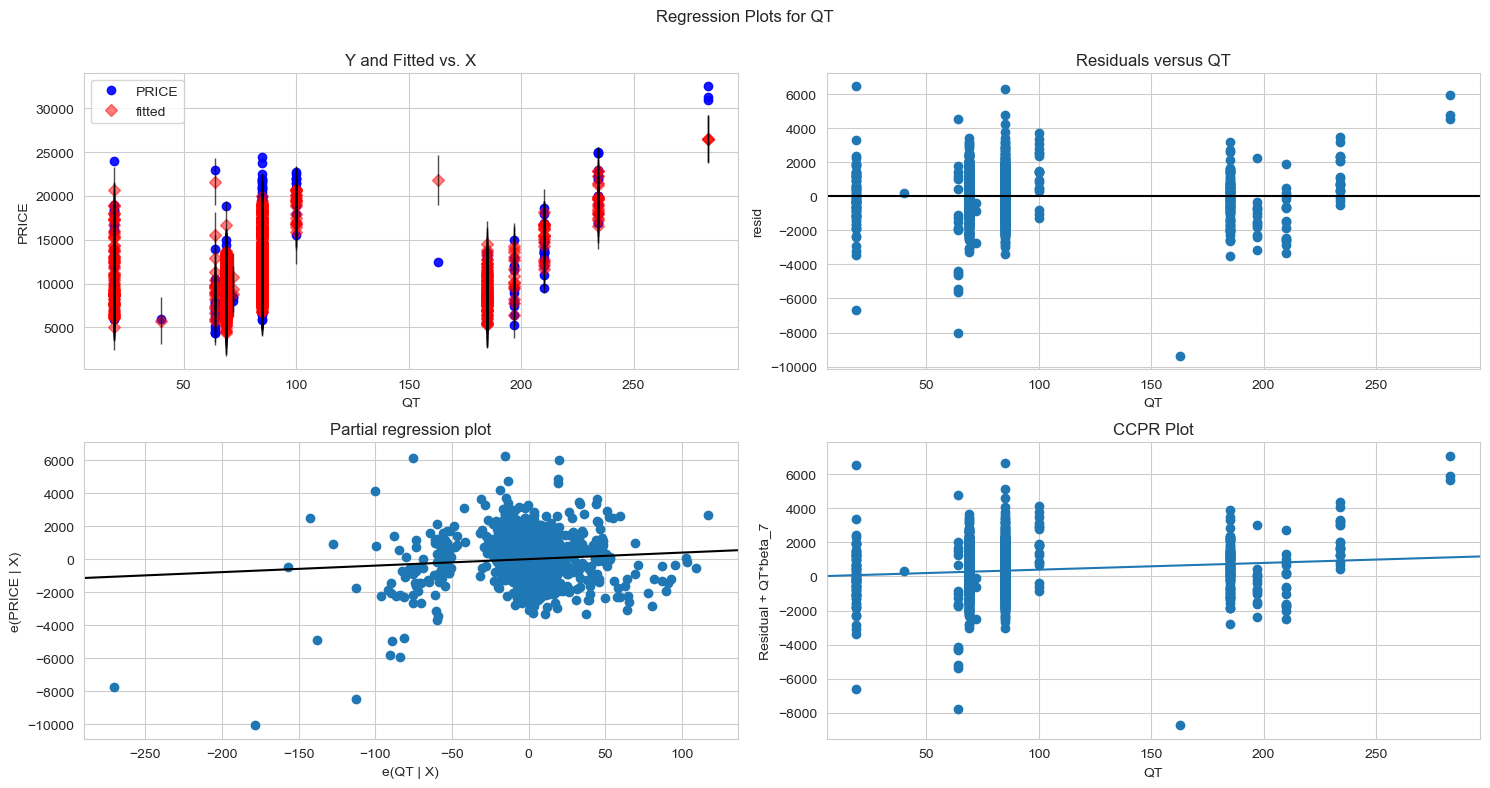

In [48]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


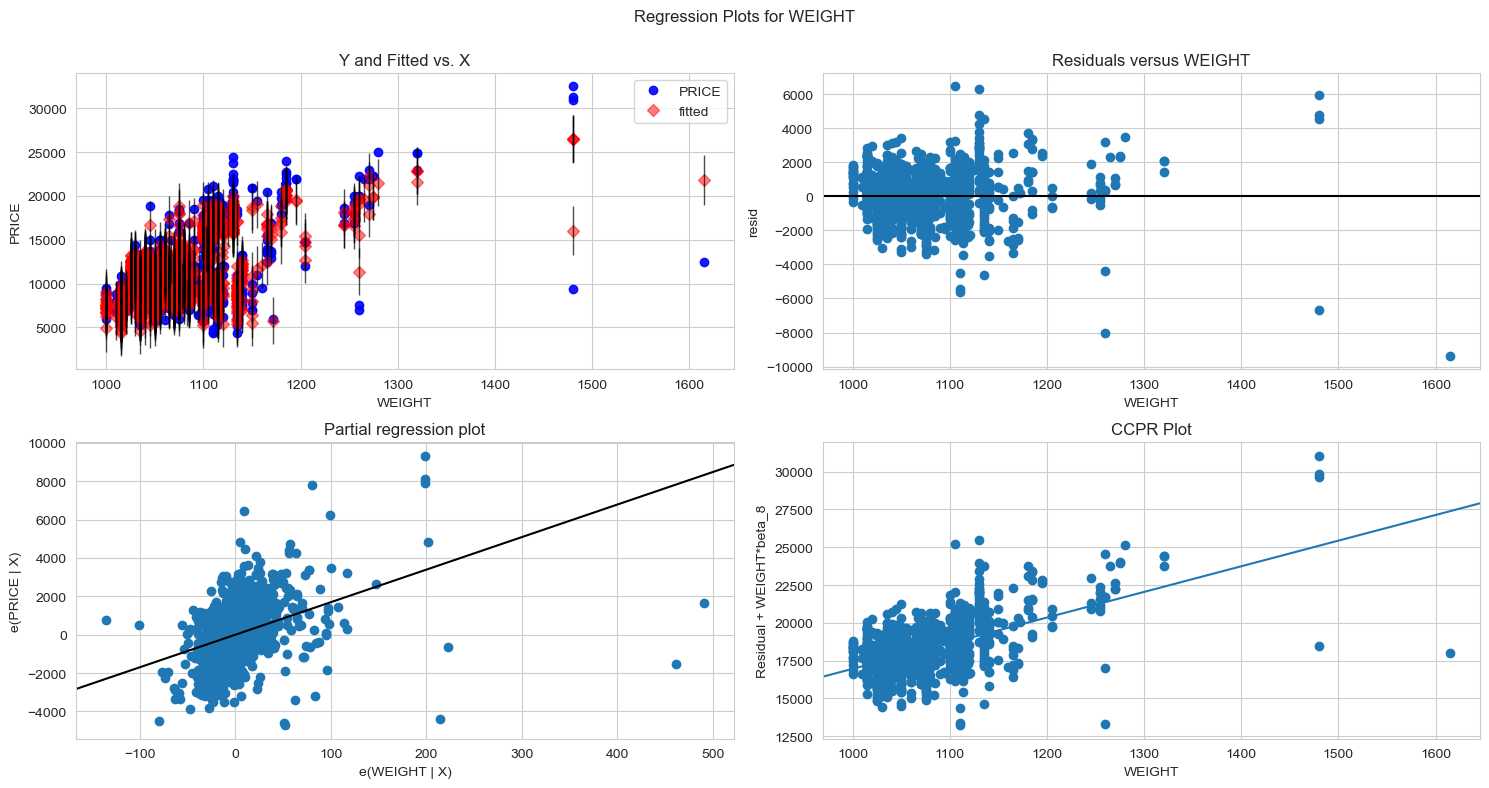

In [49]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'WEIGHT',fig=fig)
plt.show()

MODEL DELETION DIAGNOSTICS.

THERE ARE TWO TECHNIQUES:

• COOK'S DISTANCE

• LEVERAGE VALUE

In [50]:
#COOK'S DISTANCE
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

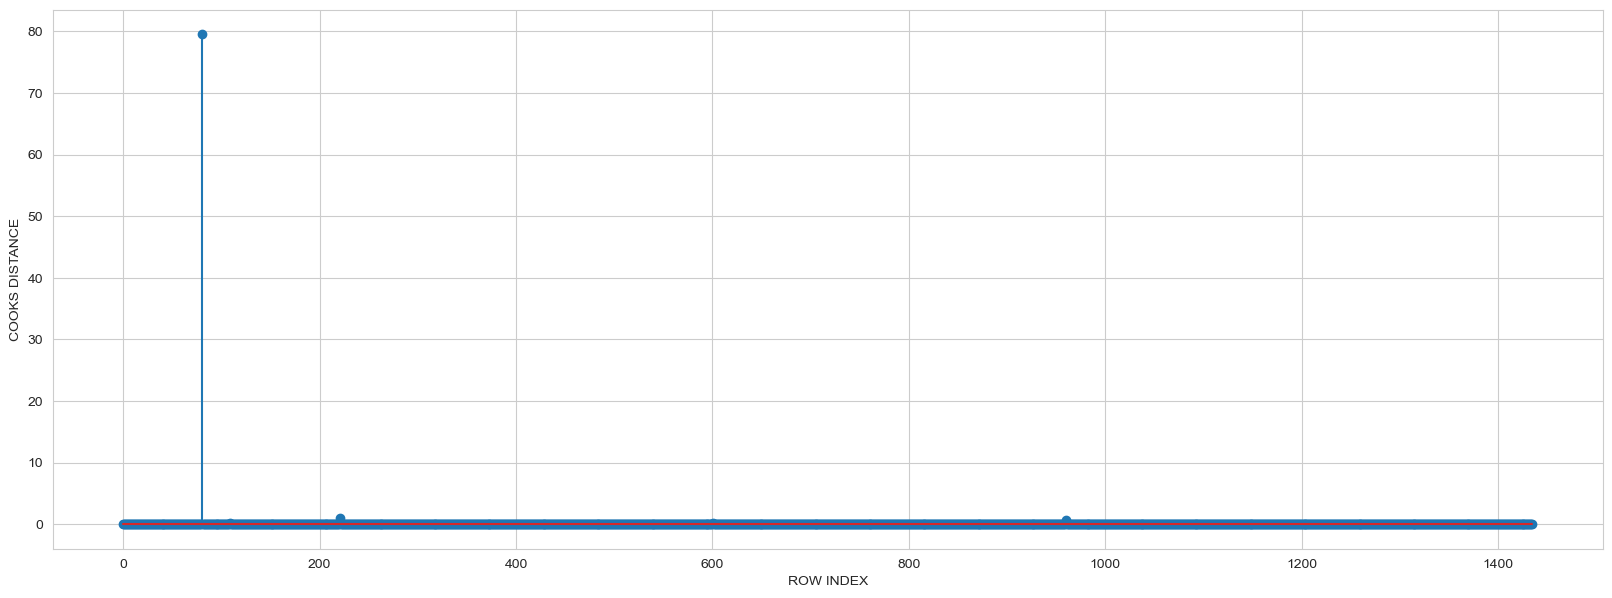

In [51]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota)),np.round(c,3))
plt.xlabel('ROW INDEX')
plt.ylabel('COOKS DISTANCE')
plt.show()

In [52]:
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

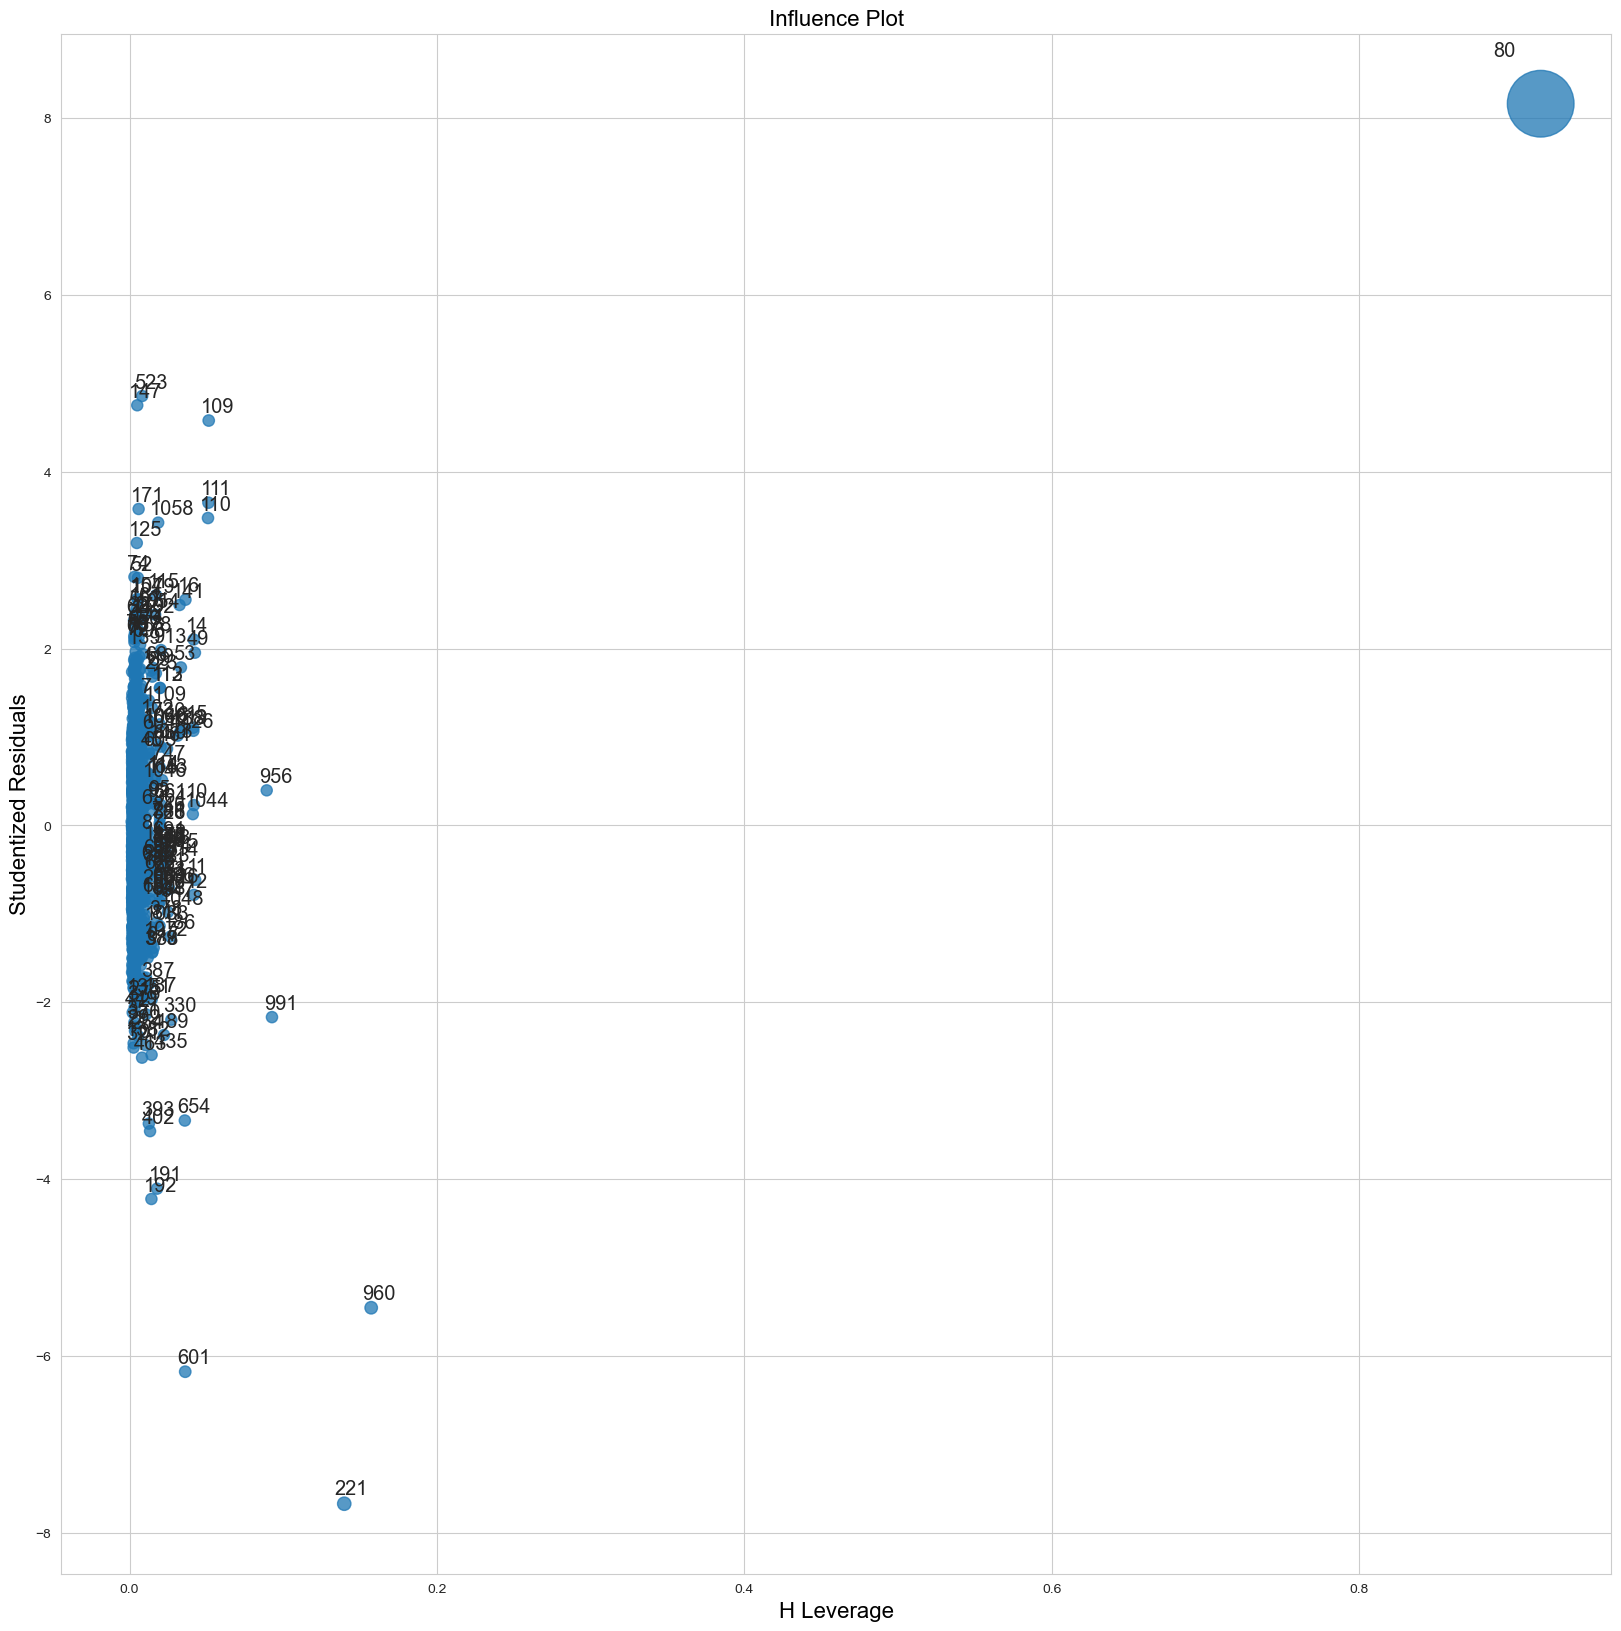

In [53]:
# 2. LEVERAGE VALUE
fig,ax = plt.subplots(figsize=(20,20))
fig = influence_plot(model,ax=ax)

In [54]:
# leverage cut-off value = 3 * (k+1)/n ; k = no. of features/columns and n = no. of datapoints
k = toyota.shape[1]
n = toyota.shape[0]
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.08147632311977716

In [55]:
toyota[toyota.index.isin([80])]

,Id,Model,PRICE,AGE,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
80,81,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,8,2002,20019,Petrol,110,1,...,1,1,1,0,0,0,0,0,0,0


In [56]:
new = toyota.copy()
new

,Id,Model,PRICE,AGE,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [57]:
toyota_1 = new.drop(new.index[[50]],axis = 0).reset_index(drop = True)
toyota_1

,Id,Model,PRICE,AGE,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [58]:
final_model = smf.ols('PRICE~AGE+KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data = toyota).fit()
final_model.rsquared

0.8637627463428192

In [59]:
toyota_1

,Id,Model,PRICE,AGE,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


MODEL PREDICTIONS

In [60]:
new_data = pd.DataFrame({'AGE':10,'KM':38000,'HP':80,'CC':1300,'DOORS':4,'GEARS':5,'QT':70,'WEIGHT':1000},index=[0])
new_data

,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,10,38000,80,1300,4,5,70,1000


In [61]:
final_model.predict(new_data)

0    14996.501402
dtype: float64

In [62]:
prediction = final_model.predict(toyota_1)
prediction

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1430     8793.758297
1431     8291.338421
1432     8454.298007
1433     8578.038121
1434    10402.438333
Length: 1435, dtype: float64